# Example 3

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, VoltageSource, Resistor, Line, Ground
from CircuitCalculator.SimpleCircuit.DiagramParser import SchematicDiagramAnalyzer, SchematicDiagramSolution, network_parser
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver

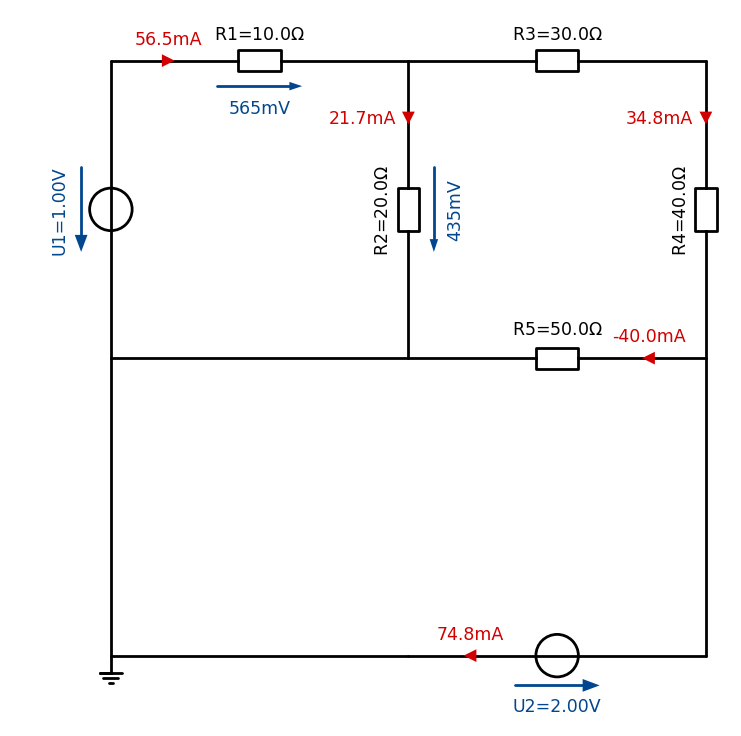

In [2]:
if __name__ == '__main__':
    with Schematic() as schematic:
        schematic += (U1:=VoltageSource(V=1, R=0, name='U1').up())
        schematic += (R1:=Resistor(R=10, name='R1').right())
        schematic += (R2:=Resistor(R=20, name='R2').down())
        schematic += Line().left()
        schematic += (R3:=Resistor(R=30, name='R3').at(R1.end).right())
        schematic += (R4:=Resistor(R=40, name='R4').down())
        schematic += (R5:=Resistor(R=50, name='R5').left())
        schematic += Line().at(R4.end).down()
        schematic += (U2:=VoltageSource(V=2, R=0, name='U2').left())
        schematic += Line().left()
        schematic += Ground()
        schematic += Line().up()
        solution = nodal_analysis_solver(network_parser(schematic))
        schemdraw_solution = SchematicDiagramSolution(SchematicDiagramAnalyzer(schematic), solution)
        schematic += schemdraw_solution.draw_voltage('R1')
        schematic += schemdraw_solution.draw_current('R1')
        schematic += schemdraw_solution.draw_voltage('R2')
        schematic += schemdraw_solution.draw_current('R2')
        schematic += schemdraw_solution.draw_current('U2')
        schematic += schemdraw_solution.draw_current('R4')
        schematic += schemdraw_solution.draw_current('R5')